# ガウス分布のパラメータ推定


## データ
- N : データの個数
- y : データの値

## パラメータ
- mu : 平均値
- s2 : 分散

## モデル
$p(\sigma) = cauchy(\sigma,0.5)$

$p(y_{n}|\mu,\sigma) = N(y_{n}|\mu,\sigma)$

In [1]:
%matplotlib inline

In [2]:
import pystan
import numpy as np
import matplotlib.pyplot as plt

In [3]:
stan_code = """
data{
    int<lower=0> N;
    real y[N];
}

parameters {
    real mu;
    real <lower =0> s2;
}

model {
    s2 ~ cauchy(0,5);
    y ~ normal(mu,sqrt(s2));
}
"""

stan_dat = {'N': 1000,
               'y': np.random.normal(1,3,size=1000)
              }

fit = pystan.stan(model_code=stan_code, data=stan_dat,iter=1000, chains=4)

print(fit)


Inference for Stan model: anon_model_3203a1877502e79205917bf85d8af026.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     1.09  2.6e-3   0.09   0.91   1.03   1.09   1.15   1.27   1271    1.0
s2     8.69    0.01   0.39   7.97   8.43   8.67   8.94   9.54   1222    1.0
lp__  -1581    0.03   1.04  -1584  -1581  -1580  -1580  -1580   1107    1.0

Samples were drawn using NUTS at Mon Nov  7 22:45:47 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


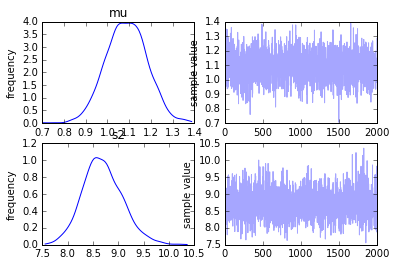

In [4]:
fit.plot()
plt.show()